# Pyber

## Dependencies and loading files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
import os

# Files to load
city_data_to_load = os.path.join('resources','city_data.csv')
ride_data_to_load = os.path.join('resources','ride_data.csv')

# Load the CSVs in a dataframe
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

## Checking the data

In [2]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [3]:
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [4]:
# Count the rows and columns that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
# Get the number of data points from the Urban cities
sum(city_data_df["type"]=="Urban")

66

In [8]:
sum(city_data_df["type"]=="Suburban")

36

In [9]:
sum(city_data_df["type"]=="Rural")

18

In [10]:
# Get the columns and rows that are not null from ride data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
# Get the data types from ride data
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

# Combining dataframes and creating initial sub-dataframes

In [13]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=['city','city'])

pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [14]:
# Create the Urban city dataframe
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]

In [15]:
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [16]:
# Create Suburban and Rural city dataframes
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']

In [17]:
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## Creating initial arrays and variables to use later

In [18]:
# Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']

In [19]:
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [20]:
# Get number of rides for suburban and rural cities
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [21]:
# Get average fare for each urban, suburban, and rural city
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [22]:
urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [23]:
# Average number of drivers for each city
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

In [24]:
urban_driver_count

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

## Scatter plots for Avg. Fare by City Types

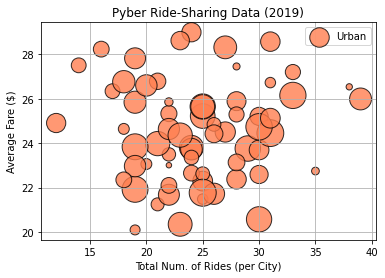

In [25]:
# Build the scatter plot for urban cities
plt.scatter(urban_ride_count,
            urban_avg_fare,
           s=10*urban_driver_count,
           c="coral",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Urban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Num. of Rides (per City)")
plt.grid(True)

# Add legend
plt.legend()

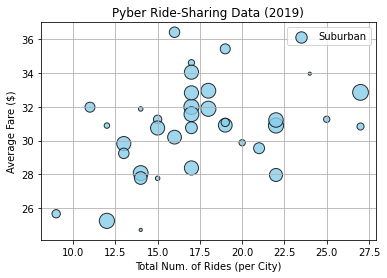

In [26]:
# Build the scatter plot for suburban cities
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
           s=10*suburban_driver_count,
           c="skyblue",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Suburban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Num. of Rides (per City)")
plt.grid(True)

# Add legend
plt.legend()

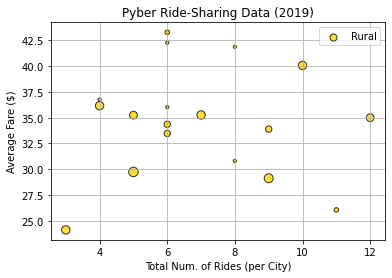

In [27]:
# Build the scatter plot for rural cities
plt.scatter(rural_ride_count,
            rural_avg_fare,
           s=10*rural_driver_count,
           c="gold",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Rural")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Num. of Rides (per City)")
plt.grid(True)

# Add legend
plt.legend()

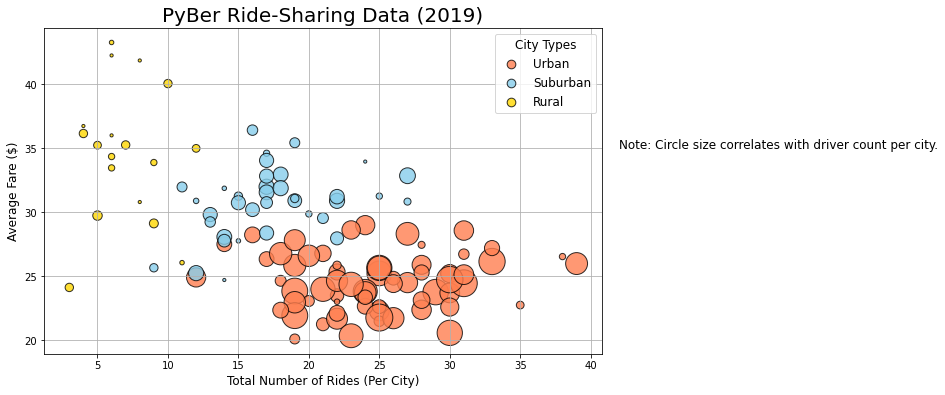

In [28]:
# Combine the scatter plots for each type of city
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_driver_count,
           c="coral",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Urban")

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count,
            c="skyblue",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Suburban")

plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count,
            c="gold",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Rural")

# Incorporate additional graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend
lgnd = plt.legend(fontsize="12",
                 mode="Expanded",
                 scatterpoints=1,
                 loc="best",
                 title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Informational text label about circle size
plt.text(42,35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()

## Inspecting data

In [29]:
# Get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [30]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [31]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


## Inspecting data and building-up arrays and variables for Ride Count, Fares, and Drivers

In [32]:
# Get ride count summary stats
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [33]:
round(urban_ride_count.describe(),2)

count    66.00
mean     24.62
std       5.41
min      12.00
25%      21.00
50%      24.00
75%      28.00
max      39.00
Name: ride_id, dtype: float64

In [34]:
round(suburban_ride_count.describe(),2)

count    36.00
mean     17.36
std       4.32
min       9.00
25%      14.00
50%      17.00
75%      19.25
max      27.00
Name: ride_id, dtype: float64

In [35]:
round(rural_ride_count.describe(),2)

count    18.00
mean      6.94
std       2.51
min       3.00
25%       5.25
50%       6.00
75%       8.75
max      12.00
Name: ride_id, dtype: float64

In [36]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [37]:
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2),round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [38]:
# Calculate the mode of the ride count for cities, by type
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [39]:
# Import stats module from SciPy
import scipy.stats as sts

In [40]:
# Calculate the measures of central tendency for the ride count for urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [41]:
# Calculate the measures of central tendency for the ride count for suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [42]:
# Calculate the measures of central tendency for the ride count for rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [43]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [44]:
# Calculate the measures of central tendency for the average fare for urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [45]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df['fare']

In [46]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df['fare']

In [47]:
# Calculate the measures of central tendency for the average fare for urban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [48]:
# Calculate the measures of central tendency for the average fare for rural cities
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [49]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers

0        5
1       72
2       57
3       34
4       46
        ..
1620    67
1621    41
1622    11
1623     3
1624    57
Name: driver_count, Length: 1625, dtype: int64

In [50]:
# Get the driver count data from suburban and rural cities
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [51]:
# Calculate the measures of central tendency for the driver counts for urban cities
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban cities is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban cities is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban cities is {mode_urban_drivers}.")

The mean driver count for urban cities is 36.68.
The median driver count for urban cities is 37.00.
The mode driver count for urban cities is ModeResult(mode=array([39]), count=array([86])).


In [52]:
# Calculate the measures of central tendency for the driver counts for suburban cities
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban cities is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban cities is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban cities is {mode_suburban_drivers}.")

The mean driver count for suburban cities is 13.71.
The median driver count for suburban cities is 16.00.
The mode driver count for suburban cities is ModeResult(mode=array([20]), count=array([79])).


In [53]:
# Calculate the measures of central tendency for the driver counts for rural cities
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural cities is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median driver count for rural cities is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver count for rural cities is {mode_rural_drivers}.")

The mean driver count for rural cities is 4.30.
The median driver count for rural cities is 4.00.
The mode driver count for rural cities is ModeResult(mode=array([1]), count=array([32])).


## Box-and-whisker plots for Ride Count Data

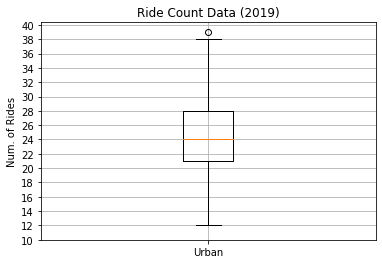

In [54]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Num. of Rides')
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()

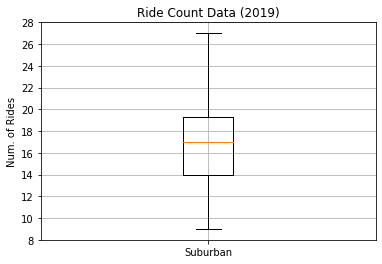

In [55]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Num. of Rides')
ax.set_yticks(np.arange(8,30, step=2.0))
ax.grid()
plt.show()

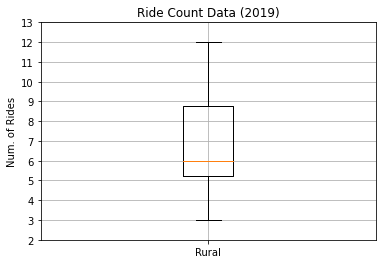

In [56]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Num. of Rides')
ax.set_yticks(np.arange(2,14, step=1.0))
ax.grid()
plt.show()

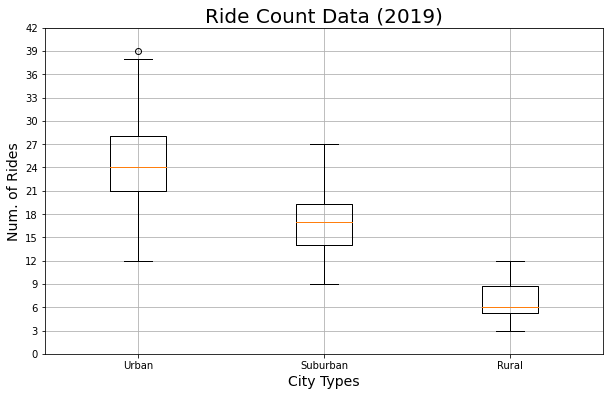

In [57]:
# Add all ride count box-and-whisker plots to the same graph
x_labels = ['Urban','Suburban','Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Num. of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure
plt.savefig('analysis/Fig2.png')
plt.show()

In [58]:
# Get the urban outlier city with 39 rides
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


## Box-and-whisker plots for Ride Fare Data

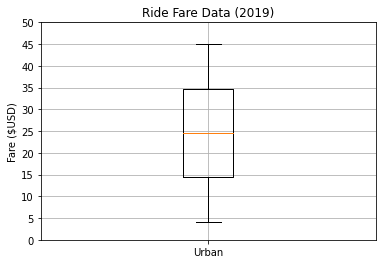

Summary Statistics


count    1625.00
mean       24.53
std        11.74
min         4.05
25%        14.55
50%        24.64
75%        34.58
max        44.97
Name: fare, dtype: float64

In [59]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add the title, y-axis label, grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show()

print('Summary Statistics')
round(urban_fares.describe(),2)

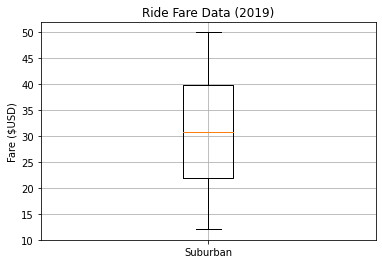

Summary Statistics


count    625.00
mean      30.97
std       10.68
min       12.05
25%       21.97
50%       30.75
75%       39.83
max       49.96
Name: fare, dtype: float64

In [60]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

# Add the title, y-axis label, grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(10,51,step=5.0))
ax.grid()
plt.show()

print('Summary Statistics')
round(suburban_fares.describe(),2)

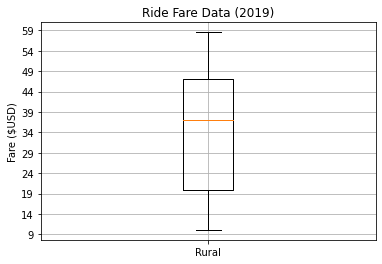

Summary Statistics


count    125.00
mean      34.62
std       14.56
min       10.11
25%       19.90
50%       37.05
75%       47.07
max       58.55
Name: fare, dtype: float64

In [61]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# Add the title, y-axis label, grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(9,60,step=5.0))
ax.grid()
plt.show()

print('Summary Statistics')
round(rural_fares.describe(),2)

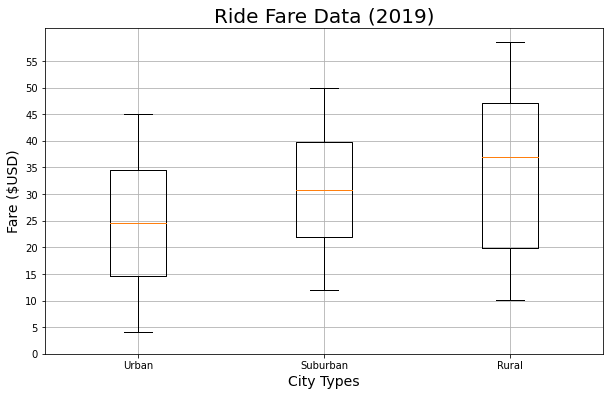

In [62]:
# Add all ride fare box-and-whisker plots to the same graph
x_labels = ['Urban','Suburban','Rural']
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()

# Save the figure
plt.savefig('analysis/Fig3.png')
plt.show()

## Box-and-whisker plots for Driver Count

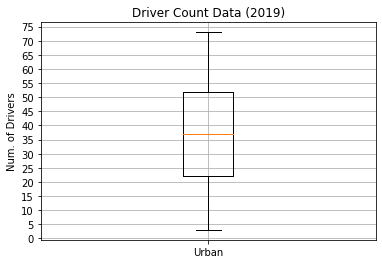

Summary Statistics


count    1625.00
mean       36.68
std        20.08
min         3.00
25%        22.00
50%        37.00
75%        52.00
max        73.00
Name: driver_count, dtype: float64

In [63]:
# Create the box-and-whisker plot for the urban driver count data
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

# Add title, y-axis label, grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Num. of Drivers')
ax.set_yticks(np.arange(0,80, step=5.0))
ax.grid()

# show plot
plt.show()

print('Summary Statistics')
round(urban_drivers.describe(),2)

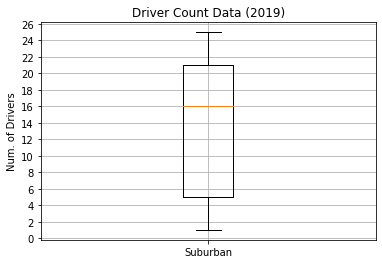

Summary Statistics


count    625.00
mean      13.71
std        8.04
min        1.00
25%        5.00
50%       16.00
75%       21.00
max       25.00
Name: driver_count, dtype: float64

In [64]:
# Create the box-and-whisker plot for the suburban driver count data
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

# Add title, y-axis label, grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Num. of Drivers')
ax.set_yticks(np.arange(0,28, step=2.0))
ax.grid()

# show plot
plt.show()

print('Summary Statistics')
round(suburban_drivers.describe(),2)

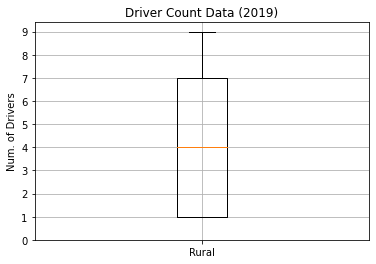

Summary Statistics


count    125.00
mean       4.30
std        2.69
min        1.00
25%        1.00
50%        4.00
75%        7.00
max        9.00
Name: driver_count, dtype: float64

In [65]:
# Create the box-and-whisker plot for the rural driver count data
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

# Add title, y-axis label, grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Num. of Drivers')
ax.set_yticks(np.arange(0,10, step=1.0))
ax.grid()

# show plot
plt.show()

print('Summary Statistics')
round(rural_drivers.describe(),2)

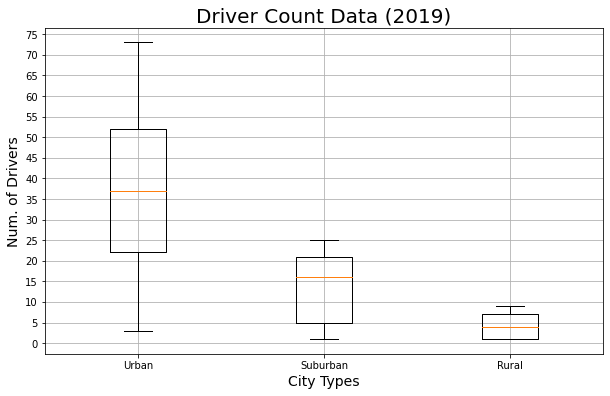

In [66]:
# Add all driver count box-and-whisker plots to the same graph
x_labels = ['Urban','Suburban','Rural']
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Num. of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()

# Save the figure
plt.savefig('analysis/Fig4.png')
plt.show()

## Build out arrays, lists, vars for % Fares by City pie chart

In [67]:
# Get the sum of the fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [68]:
# Get the sum of all the fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [69]:
# Calculate the percentage of fare for each city type
type_percents = 100 * sum_fares_by_type / total_fares
round(type_percents,2)

type
Rural        6.81
Suburban    30.46
Urban       62.72
Name: fare, dtype: float64

## Percentage of Fares by city pie charts

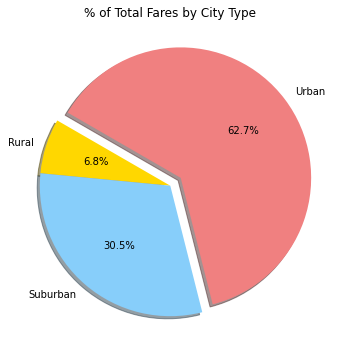

In [70]:
# Import mpl to change the plot configs using rcParams
import matplotlib as mpl

# Build the pie chart
plt.subplots(figsize=(10,6))
plt.pie(type_percents,
        labels=['Rural', 'Suburban','Urban'],
        colors=['gold','lightskyblue','lightcoral'],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)

plt.title('% of Total Fares by City Type')

# Change default font size
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig('analysis/Fig5.png')

# Show figure
plt.show()

## Build out series and variables for percentage of rides by city type

In [71]:
# Calculate the percentage of rides for each city type
ride_percents = 100 * pyber_data_df.groupby(['type']).count()['ride_id']/pyber_data_df['ride_id'].count()
round(ride_percents,2)

type
Rural        5.26
Suburban    26.32
Urban       68.42
Name: ride_id, dtype: float64

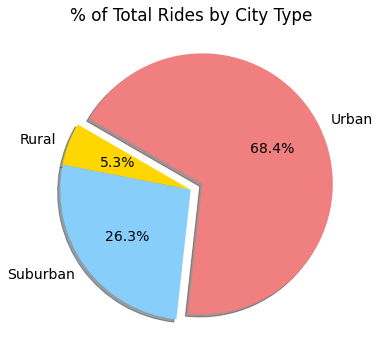

In [72]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title("% of Total Rides by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig6.png")

# Show Figure
plt.show()

## Driver percentages by City Type calculations

In [73]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
round(driver_percents, 2)

type
Rural        2.62
Suburban    16.48
Urban       80.89
Name: driver_count, dtype: float64

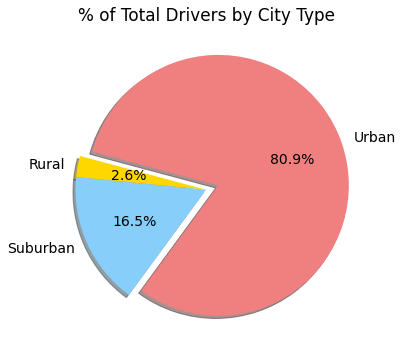

In [74]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=165)

plt.title("% of Total Drivers by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig7.png")

# Show Figure
plt.show()